<a href="https://colab.research.google.com/github/tshreegupta/ECE595DL/blob/main/Project2/Project_2_Student_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student Name: 
#ECE 595 Machine Learning II
#Project 2: Autoencoders - Student Code

In [3]:
#Import necessary packages
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


#Part 0: Importing and Normalizing Data

In [4]:
#Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(data_train.shape[0],data_train.shape[1]*data_train.shape[2])

(60000, 784)


#Part 1: Deep Fully-Connected AutoEncoder

Answer the following questions: 


1.  We want to predict output values of the intensity of the pixels which are between 0 to 1. Therefore choice of output layer activation function is important. (Open ended reasoning question). (a) Choose 'softmax’ or ‘sigmoid’. Reason why one is preferred over the other.
Ans. Softmax would have worked in case we were classifying digits but since it's a reconstruction sigmoid would be a better choice. 

In [8]:
#Reshape training and testing data into 784-dimensional vectors
#FILL IN THIS CODE BLOCK
data_train_reshape = data_train.reshape(data_train.shape[0],data_train.shape[1]*data_train.shape[2])
data_test_reshape = data_test.reshape(data_test.shape[0],data_test.shape[1]*data_test.shape[2])

In [15]:
print(data_test_reshape.shape)

(10000, 784)


In [35]:
#Create autoencoder architecture
def deep_ae(act):
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    # Layer1: First Hidden Layer
    model.add(Dense(400,activation=act,use_bias= True,kernel_initializer='normal', input_dim = 784))
    
    # Layer2: Second Hidden Layer
    model.add(Dense(200,activation=act,use_bias= True,kernel_initializer='normal'))
    
    # Layer3: Third Hidden Layer
    model.add(Dense(100,activation=act,use_bias= True,kernel_initializer='normal'))

    # Layer4: Fourth Hidden Layer
    model.add(Dense(200,activation=act,use_bias= True,kernel_initializer='normal'))

    # Layer5: Fifth Hidden Layer
    model.add(Dense(400,activation=act,use_bias= True,kernel_initializer='normal'))

    # Layer6: Output Layer
    model.add(Dense(784,activation=act,use_bias= True,kernel_initializer='normal'))
    return model

#Create deep autoencoder graph
deep_ae_mse = deep_ae('sigmoid')
#Create deep autoencoder graph
deep_ae_bce = deep_ae('sigmoid')
#Create deep autoencoder graph
deep_ae_mse_l = deep_ae('linear')
#Create deep autoencoder graph
deep_ae_bce_l = deep_ae('linear')


In [36]:
#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
#Part1: mean_squared_error
deep_ae_mse.compile(loss= 'mean_squared_error',
                    optimizer= 'adam',
                    metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
deep_ae_meta_mse = deep_ae_mse.fit(data_train_reshape,data_train_reshape,
                           batch_size=1024,
                           epochs=150,
                           shuffle=True,
                           validation_data=(data_test_reshape,data_test_reshape))

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 7s 112us/step - loss: 0.0814 - accuracy: 0.0093 - val_loss: 0.0677 - val_accuracy: 0.0037
Epoch 2/150
60000/60000 [==============================] - 7s 108us/step - loss: 0.0674 - accuracy: 0.0127 - val_loss: 0.0675 - val_accuracy: 0.0037
Epoch 3/150
60000/60000 [==============================] - 7s 109us/step - loss: 0.0674 - accuracy: 0.0135 - val_loss: 0.0675 - val_accuracy: 0.0065
Epoch 4/150
60000/60000 [==============================] - 7s 109us/step - loss: 0.0673 - accuracy: 0.0130 - val_loss: 0.0676 - val_accuracy: 0.0049
Epoch 5/150
60000/60000 [==============================] - 6s 108us/step - loss: 0.0673 - accuracy: 0.0107 - val_loss: 0.0676 - val_accuracy: 0.0143
Epoch 6/150
60000/60000 [==============================] - 6s 108us/step - loss: 0.0673 - accuracy: 0.0124 - val_loss: 0.0675 - val_accuracy: 0.0037
Epoch 7/150
60000/60000 [==============================]

In [38]:
#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
#Part2: binary_crossentropy
deep_ae_bce.compile(loss= 'binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
deep_ae_meta_bce = deep_ae_bce.fit(data_train_reshape,data_train_reshape,
                           batch_size=1024,
                           epochs=150,
                           shuffle=True,
                           validation_data=(data_test_reshape,data_test_reshape))

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 8s 127us/step - loss: 0.3143 - accuracy: 0.7824 - val_loss: 0.2635 - val_accuracy: 0.8029
Epoch 2/150
60000/60000 [==============================] - 7s 124us/step - loss: 0.2634 - accuracy: 0.8028 - val_loss: 0.2630 - val_accuracy: 0.8008
Epoch 3/150
60000/60000 [==============================] - 8s 125us/step - loss: 0.2632 - accuracy: 0.8031 - val_loss: 0.2628 - val_accuracy: 0.8030
Epoch 4/150
60000/60000 [==============================] - 8s 125us/step - loss: 0.2631 - accuracy: 0.8028 - val_loss: 0.2629 - val_accuracy: 0.8057
Epoch 5/150
60000/60000 [==============================] - 8s 126us/step - loss: 0.2616 - accuracy: 0.8030 - val_loss: 0.2571 - val_accuracy: 0.8000
Epoch 6/150
60000/60000 [==============================] - 8s 126us/step - loss: 0.2490 - accuracy: 0.7980 - val_loss: 0.2431 - val_accuracy: 0.7923
Epoch 7/150
60000/60000 [==============================]

In [39]:
#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
#Part3: Mean squared Error with linear activation function
deep_ae_mse_l.compile(loss= 'mean_squared_error',
                    optimizer= 'adam',
                    metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
deep_ae_meta_mse_l = deep_ae_mse_l.fit(data_train_reshape,data_train_reshape,
                           batch_size=1024,
                           epochs=150,
                           shuffle=True,
                           validation_data=(data_test_reshape,data_test_reshape))

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 6s 108us/step - loss: 0.0441 - accuracy: 0.0104 - val_loss: 0.0224 - val_accuracy: 0.0111
Epoch 2/150
60000/60000 [==============================] - 6s 107us/step - loss: 0.0176 - accuracy: 0.0121 - val_loss: 0.0136 - val_accuracy: 0.0129
Epoch 3/150
60000/60000 [==============================] - 6s 106us/step - loss: 0.0121 - accuracy: 0.0136 - val_loss: 0.0104 - val_accuracy: 0.0123
Epoch 4/150
60000/60000 [==============================] - 6s 106us/step - loss: 0.0098 - accuracy: 0.0142 - val_loss: 0.0089 - val_accuracy: 0.0147
Epoch 5/150
60000/60000 [==============================] - 6s 106us/step - loss: 0.0086 - accuracy: 0.0141 - val_loss: 0.0079 - val_accuracy: 0.0139
Epoch 6/150
60000/60000 [==============================] - 6s 106us/step - loss: 0.0077 - accuracy: 0.0142 - val_loss: 0.0072 - val_accuracy: 0.0147
Epoch 7/150
60000/60000 [==============================]

In [40]:
#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
#Part4: Binary CrOSS eNTROPY with linear activation function
deep_ae_bce_l.compile(loss= 'binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
deep_ae_meta_bce_l = deep_ae_bce_l.fit(data_train_reshape,data_train_reshape,
                           batch_size=1024,
                           epochs=150,
                           shuffle=True,
                           validation_data=(data_test_reshape,data_test_reshape))

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 8s 129us/step - loss: 0.3913 - accuracy: 0.6830 - val_loss: 0.2944 - val_accuracy: 0.6611
Epoch 2/150
60000/60000 [==============================] - 8s 126us/step - loss: 0.2604 - accuracy: 0.6357 - val_loss: 0.2246 - val_accuracy: 0.6544
Epoch 3/150
60000/60000 [==============================] - 8s 125us/step - loss: 0.2244 - accuracy: 0.6509 - val_loss: 0.2096 - val_accuracy: 0.6862
Epoch 4/150
60000/60000 [==============================] - 8s 126us/step - loss: 0.1950 - accuracy: 0.6544 - val_loss: 0.1922 - val_accuracy: 0.6235
Epoch 5/150
60000/60000 [==============================] - 7s 125us/step - loss: 0.1848 - accuracy: 0.6548 - val_loss: 0.1921 - val_accuracy: 0.6576
Epoch 6/150
60000/60000 [==============================] - 8s 125us/step - loss: 0.2414 - accuracy: 0.6319 - val_loss: 0.2449 - val_accuracy: 0.5687
Epoch 7/150
60000/60000 [==============================]

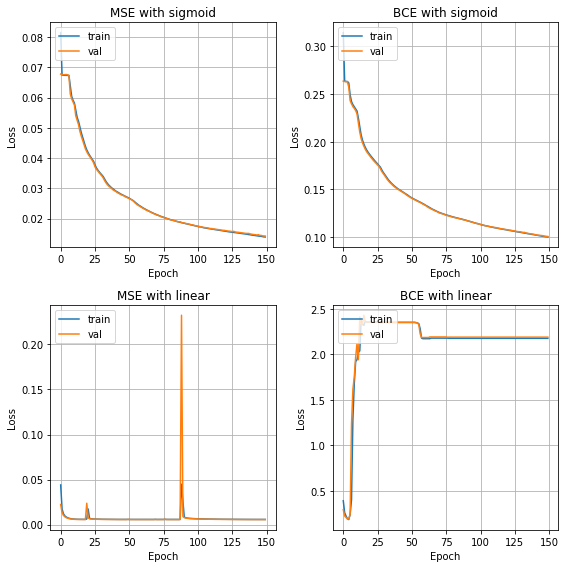

In [48]:
#Plot loss vs epoch for BCE and MSE [Together or separate, Both accepted]
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
fig =  plt.figure(figsize=(8, 8))

#Plot MSE with sigmoid activation function
ax = fig.add_subplot(2,2,1)
ax.plot(deep_ae_meta_mse.history['loss'])
ax.plot(deep_ae_meta_mse.history['val_loss'])
ax.set_title('MSE with sigmoid')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend(['train','val'],loc='upper left')
ax.grid(True)
fig.tight_layout()

#Plot BCE with sigmoid activation function
ax = fig.add_subplot(2,2,2)
ax.plot(deep_ae_meta_bce.history['loss'])
ax.plot(deep_ae_meta_bce.history['val_loss'])
ax.set_title('BCE with sigmoid')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend(['train','val'],loc='upper left')
ax.grid(True)

#Plot MSE with linear activation function
ax = fig.add_subplot(2,2,3)
ax.plot(deep_ae_meta_mse_l.history['loss'])
ax.plot(deep_ae_meta_mse_l.history['val_loss'])
ax.set_title('MSE with linear')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend(['train','val'],loc='upper left')
ax.grid(True)
fig.tight_layout()

#Plot BCE with linear activation function
ax = fig.add_subplot(2,2,4)
ax.plot(deep_ae_meta_bce_l.history['loss'])
ax.plot(deep_ae_meta_bce_l.history['val_loss'])
ax.set_title('BCE with linear')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend(['train','val'],loc='upper left')
ax.grid(True)

fig.tight_layout()

In [49]:
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
#FILL THIS IN
reconstruction_mse = deep_ae_mse.predict(data_test_reshape)
reconstruction_bce = deep_ae_bce.predict(data_test_reshape)
reconstruction_mse_l = deep_ae_mse_l.predict(data_test_reshape)
reconstruction_bce_l = deep_ae_bce_l.predict(data_test_reshape)

#Obtain encoder representation of data
get_hl = K.function([deep_ae_mse.layers[0].input], [deep_ae_mse.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl = get_hl([data_test_reshape[0:10]])[0]


(-0.5, 27.5, 279.5, -0.5)

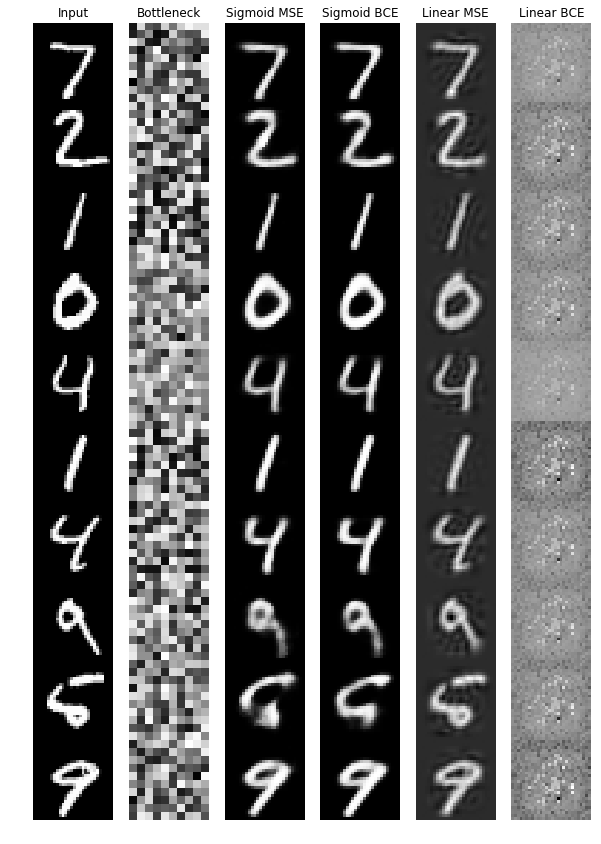

In [59]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES

fig = plt.figure(figsize=(10,20))
plt.gray()

#Input Image
ax = fig.add_subplot(1,6,1)
ax.imshow(data_test[0:10].reshape(-1,28))
ax.set_title('Input')
ax.axis('off')

#Bottleneck Layer
ax = fig.add_subplot(1,6,2)
ax.imshow(deep_ae_hl.reshape(-1,10))
ax.set_title('Bottleneck')
ax.axis('off')

#Sigmoid MSE output
ax = fig.add_subplot(1,6,3)
ax.imshow(reconstruction_mse[0:10].reshape(-1,28))
ax.set_title('Sigmoid MSE')
ax.axis('off')

#Sigmoid BCE output
ax = fig.add_subplot(1,6,4)
ax.imshow(reconstruction_bce[0:10].reshape(-1,28))
ax.set_title('Sigmoid BCE')
ax.axis('off')

#Linear MSE output
ax = fig.add_subplot(1,6,5)
ax.imshow(reconstruction_mse_l[0:10].reshape(-1,28))
ax.set_title('Linear MSE')
ax.axis('off')

#Linear BCE output
ax = fig.add_subplot(1,6,6)
ax.imshow(reconstruction_bce_l[0:10].reshape(-1,28))
ax.set_title('Linear BCE')
ax.axis('off')

Answer the following questions: 


1.  Question 2c: BONUS [reasoning question]: Pair the output layer activation and loss function which performs better together. Linear, sigmoid, Binary cross entropy and Mean Square error
 

2.  Question 5: Which loss function is better and why?

3.  Question 6: If we were to predict pixels values [0 to 255] directly at the output of last layer. Should there be an activation function in last later?  If yes, which activation function and why?,  If No, reason why?

#Part 2: Deep Convolutional AutoEncoder

In [ ]:
#Reshape data into 2-D signals and account for grayscale channel in each image
#FILL IN THIS CODE BLOCK

In [ ]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    #Layer 1: Conv
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28,1)))
    return model

#Create deep autoencoder graph
conv_ae = cae()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN

#Train the model and assign training meta-data to a variable
#FILL THIS IN

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
#FILL THIS IN


#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl = get_hl([data_test_reshape_cae])[0]

In [ ]:
#Plot loss vs epoch  for BCE and MSE [Together or separate, Both accepted]
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES

Answer the following questions: 


1.  Question 4: Which loss function is better and why?

#Part 3: Denoising AutoEncoder

In [ ]:
#Inject noise into testing data
noise_factor = 0.25
data_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
data_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)

#Clip to stay within valid (normalized) pixel range
data_train_noisy = np.clip(data_train_noisy, 0., 1.)
data_test_noisy = np.clip(data_test_noisy, 0., 1.)

#Reshape data to comply with input of denoising autoencoder
#FILL THIS IN

In [ ]:
#Show samples of 10 original images and their corrsponding noisy counterparts from the training set
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES

In [ ]:
#Create denoising autoencoder architecture
def dae():

    #FILL THIS IN WITH MODEL ARCHITECTURE

    return model
  

  
#Compile and train the DAE
#FILL THIS IN


#Generate denoised versions of noisy inputs
#FILL THIS IN


In [ ]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

In [ ]:
#Show samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES